# KNN Classifier

## Importing the libraries that will be used. 

In [2]:
# import sys
# import time
import numpy as np
# import pickle
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import utils.reader as reader
# from matplotlib import style
# style.use('ggplot')

# from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.externals import joblib

## Retrieving datasets 
- The data are stored in the four files in data/fashion directory.
- The data are distributed in different files according to training and testing data.
- The data are retrieved through a self-defined method which is located in utils/reader.py.

In [3]:
x_train, y_train = reader.load_mnist('data/fashion', kind='train')
x_test, y_test = reader.load_mnist('data/fashion', kind='test')

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Converting the data to numpy array

In [4]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

## Training KNN Classifier 

In [5]:
clf1 = KNeighborsClassifier(n_neighbors=3,algorithm='auto',n_jobs=10)
clf1.fit(x_train,y_train)
clf2 = KNeighborsClassifier(n_neighbors=6,algorithm='auto',n_jobs=10)
clf2.fit(x_train,y_train)
clf3 = KNeighborsClassifier(n_neighbors=9,algorithm='auto',n_jobs=10)
clf3.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=10, n_neighbors=9, p=2,
           weights='uniform')

## Storing the classifier
- Classifier will be needed for the next testing purpose.
- Using ScikitLearn library to done the job.
- The classifier will be stored in the filename.pkl.

In [ ]:
joblib.dump(clf1, 'clf1.pkl')
recogniser = joblib.load('clf1.pkl')

## Making prediction for the 10000 testing datasets

In [13]:
print('\nPredicting testing datasets...')
prediction1 = clf1.predict(x_test)
prediction2 = clf2.predict(x_test)
prediction3 = clf3.predict(x_test)
print(prediction1)


Predicting testing datasets...
[9 2 1 ... 8 1 7]


## Calculating accuracy
- The accuracy is calculated by comparing both of the labels of testing datasets and the predicted results from the classifier. 

In [14]:
print('\nCalculating accuracy for 3 trained classifier...')
accuracy1 = metrics.accuracy_score(y_test, prediction1)
accuracy2 = metrics.accuracy_score(y_test, prediction2)
accuracy3 = metrics.accuracy_score(y_test, prediction3)
print(accuracy1)
print(accuracy2)
print(accuracy3)


Calculating accuracy for 3 trained classifier...
0.8541
0.8544
0.8519


## Creating visualization
- Confusion matrix is created in order for further analysis of the data. 
- This confusion matrix is created with unnormalized data


Creating confusion matrix...


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


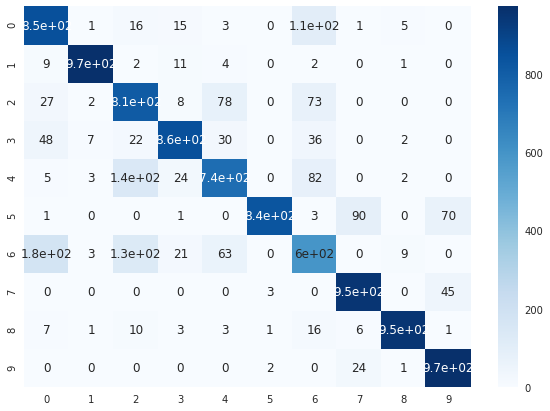

In [20]:
print('\nCreating unnormalized confusion matrix...')
conf_mat = confusion_matrix(y_test,prediction1)
df_cm = pd.DataFrame(conf_mat, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
plt.ylabel('True label')
plt.xlabel('Predicted label')
sn.heatmap(df_cm, cmap="Blues", annot=True)


Creating normalized confusion matrix...


/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)
/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


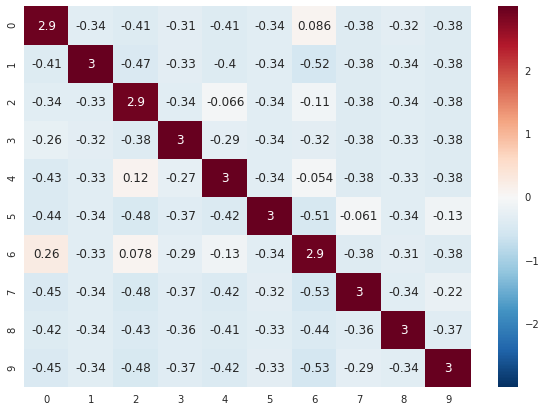

In [23]:
print('\nCreating normalized confusion matrix...')
from sklearn import preprocessing
conf_mat = preprocessing.scale(conf_mat)
df_cm = pd.DataFrame(conf_mat, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
plt.ylabel('True label')
plt.xlabel('Predicted label')
sn.heatmap(df_cm, annot=True)


# Creating array list for the 10 different cloth labels

In [24]:
cloth_label = {
 0: "T-shirt/top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sandal",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}

## Making prediction for the image shown

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


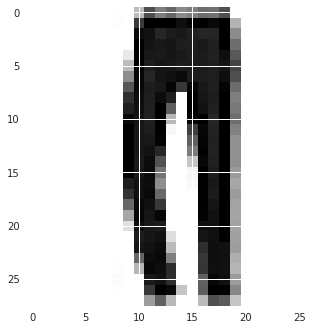

Prediction: Trouser


In [25]:
plt.imshow(x_test[2].reshape(28,28), cmap='gray_r')
plt.show()

value = recogniser.predict([x_test[2].reshape(784)])
print("Prediction: " + cloth_label[value[0]])

# Decision Tree Classifier

# Importing the libraries that will be used.

In [26]:
import numpy as np
import pandas as pd
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import utils.reader as reader

from sklearn import metrics 
from sklearn import tree
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score, confusion_matrix

# Training Decision Tree Classifier

In [27]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

# Storing the classifier

In [28]:
joblib.dump(clf, 'clf_tree.pkl')
recogniser2 = joblib.load('clf_tree.pkl')

# Making prediction for the 10000 testing datasets

In [29]:
print('\nPredicting testing datasets...')
tree_prediction = recogniser2.predict(x_test)
print(tree_prediction)


Predicting testing datasets...
[9 6 1 ... 8 1 5]


# Calculating accuracy

In [30]:
print('\nCalculating accuracy of trained classifier...')
tree_accuracy = metrics.accuracy_score(y_test, tree_prediction)
print(tree_accuracy)


Calculating accuracy of trained classifier...
0.7892


# Creating visualization


Creating Unnormalized Confusion Matrix...


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


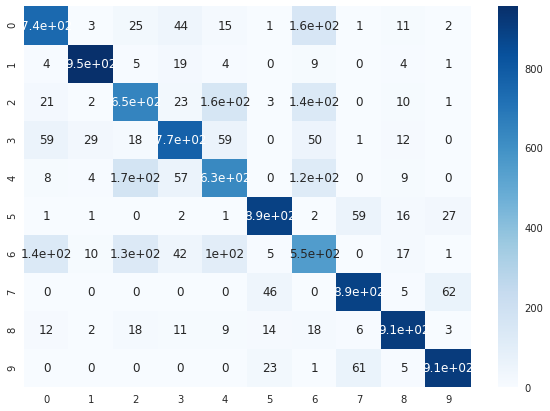

In [32]:
print('\nCreating Unnormalized Confusion Matrix...')
conf_mat = confusion_matrix(y_test,tree_prediction)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
plt.ylabel('True label')
plt.xlabel('Predicted label')
sn.heatmap(df_cm, cmap="Blues", annot=True)

Creating Normalized Confusion Matrix...


/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)
/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


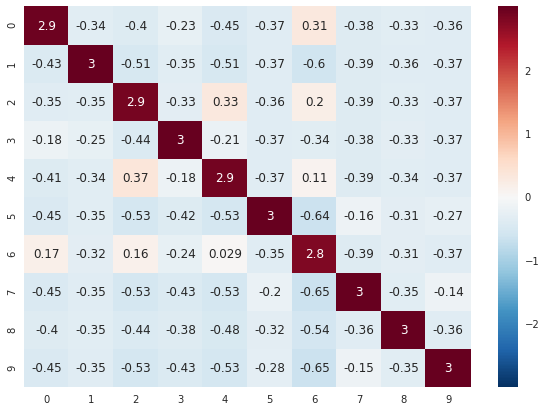

In [33]:
print('Creating Normalized Confusion Matrix...')
conf_mat = preprocessing.scale(conf_mat)
df_cm = pd.DataFrame(conf_mat, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
plt.ylabel('True label')
plt.xlabel('Predicted label')
sn.heatmap(df_cm, annot=True)


# Making prediction for the image shown

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


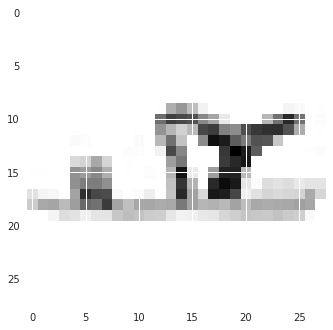

[5]
Prediction: Sandal


In [34]:
plt.imshow(x_test[5200].reshape(28,28), cmap='gray_r')
plt.show()

value = recogniser2.predict([x_test[5200].reshape(784)])
print(value)
print("Prediction: " + cloth_label[value[0]])

# Way of reading datasets from 4 files in reader.py

def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    // Declare the file path for each file that is storing the MNIST data.
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    // Use one of the Python library to read a compressed file.
    // The parameter 'rb' means this file is allowed to be read only and 
    // to ensure that this file is opened in a binary mode.
    
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    // Images and labels of each of the data will be returned from this method.
    return images, labels

# Comparison Between 2 Classifiers

# Comparing through accuracy

By calculating the accuracy score through y_test and predicted result from classifier, we can clearly see that the accuracy of KNN is much more higher than that of the Decision Tree.

Different values of n_neighbors give us different accuracy of the model. The smaller the n_neighbors, the lower the accuracy is. The accuracy is slightly increasing as the n_neighbors increasing. But, at certain maximum value of of n_neighbors, the accuracy falls. In this case, when the n_neighbors reaches 9, the accuracy falls. Hence, this becomes a problem for us when we are going to train a model with high accuracy. 

For Decision tree, the accuracy is less than 0.8, which is only 0.7892. It is quite a low accuracy compared to other classifier. 

In short, by comparing through accuracy, KNN classifier is much more accurate than Decision Tree. 


# Comparing through confusion matrix

According to confusion matrix for both of the classifier, there are 403 wrong predicted values in KNN while there are 993 wrong predicted values in Decision Tree. For example, this means that there are 403 clothes that are predicted wrongly by the KNN classifier. 

Besides, the type of cloth that has highest and lowest accuracy are different between KNN and Decision Tree classifier. 
- In KNN classifier, Least accurate: Label 4(Coat); Most accurate: Label 9(Ankle Boot).
- Label 4 has 116 wrong predicted result, which means that 116 coats are predicted as other type of cloth by KNN classifier. Label 9 (which is Ankle Boot) has only 27 wrong predicted result from the classifier. 88% from the wrong predicted result of Ankle Boot is caused by the wrong prediction as a Sneaker (24 Ankle Boots are predicted as Sneakers). 
- In Decision Tree, Least accurate: Label 3(Dress); Most accurate: Label 1(Trouser).
- 223 of label 3 (which is Dress) are predicted wrongly as other clothes such as Tshirt/Top and Shirt. Because 3 of these clothes looks a bit similar in the apperance. While the type of cloth which has the highest accuracy (only 46 wrong predicted result) in this classifier is label 1 (which is Trouser). 

The overall accuracy for each cloth type in KNN is much higher than that in Decision Tree. There are lesser mistakes that did by the KNN classifier and hence it is considered more accurate than Decision Tree according to Confusion Matrix. 

# Pros and Cons of both classifiers

KNN Classifier

Pros 
- Simple implementation
- Flexible distance choices (n_neighbors)
- High accuracy of prediction with enough datasets

Cons 
- Nearest neighbors might be difficult to be found 
- Longer training and predicting time for the classifier

Decision Tree Classifier

Pros 
- Rapid training and predicting time 
- Concept can be understood easily 

Cons
- Lower accuracy of prediction compared to other classifiers

# Improvement of Accuracy

# Using K-Fold Cross-Validation
- Accuracy of the Decision Tree can be improved through the cross-validation in training data. 
- Besides, the optimal value of n_neighbors in KNN classifier can be determined through cross-validation as shown below. 
- This method will take long time to be completed because of there are many different values of n_neighbors. 
- The common results from this method are n=5 or n=7 where the classifier has the highest accuracy. 
- If we use more values of n_neighbors and higher value for 'cv', then we will get a more accurate result from this method. 

In [ ]:
# create odd values of n_neighbors 
myList = list(range(1,50))

# separate odd values from the list
neighbors = filter(lambda x: x%2 != 0, myList)

# array for cross-validation scores
cv_scores = []

# perform 10-fold cross validation
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# change to value of misclassification error
MSE = [1-x for x in cv_scores]

# determine the optimal value of n_neighbors
optimal_n = neighbors[MSE.index(min(MSE))]
print("The optimal value of n_neighbors is %d" %optimal_n)

# Relationship between misclassification error vs n
plt.plot(neighbors, MSE)
plt.xlabel('Value of n_neighbors')
plt.ylabel('Misclassification Error')
plt.show()

# Using convolutional neural network


- Models trained using Tensorflow and Keras will be able to provide a more accurate result compared with KNN and Decision Tree. 
- By using neural network, the number of hidden layers/neurons and also the different kinds of features will help to increase the accuracy. 